$S$: Susceptibles

$I$: Infectives

$R$: Recovered with Immunity

$\beta$: Contact Rate

$\mu$: Average Death Rate

$B$: Average Birth Rate

$\frac{1}{\epsilon}$: Average Latent Period

$\frac{1}{\gamma}$: Average infectious period

$R_0$: Basic Reporoduction Number

$N$: Total Population


$$\frac{dS}{dt} = (1-ep) \mu N_{unvaccinated \ births} - \beta IS_{infections} - \mu S_{deaths}$$

$$\frac{dV}{dt} = ep \mu N_{vaccinated births} - \mu V_{deaths}$$

$$\frac{dI}{dt} = \beta IS_{infections} - \gamma I_{recoveries} - \mu I_{deaths}$$

$$\frac{dR}{dt} = \gamma I_{recoveries} - \mu R_{deaths}$$

where p is a fraction of the newly born individuals that are vaccinated at birth

the vaccination takes in a fraction e of the vaccinated individuals and protects them for an average period $\frac{1}{\omega}$ years

In [207]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

#Statistics from cia world factbook

e = .1
p = .75 
#mu = .00815
mu = .02
#N = 321368864 #As of Jul 2015 estimate
beta = .002
gamma = .5

S0 = 100
V0 = 50
I0 = 75
R0 = 10

N = S0 + I0 + R0 + V0

#S[i] = (1-e*p)*mu*N - beta*I[i-1]*S[i-1] - mu*S[i-1]
#V[i] = e*p*mu*N - mu*V[i-1]
#I[i] = beta*I[i-1]*S[i-1] - gamma*I[i-1] - mu*I[i-1]
#R[i] = gamma*I[i-1] - mu*R[i-1]

In [208]:
def f(u):
    
    S = u[0]
    V = u[1]
    I = u[2]
    R = u[3]
    
    return numpy.array([(1-e*p)*mu*N - beta*I*S - mu*S,
                       e*p*mu*N - mu*V,
                       beta*I*S - gamma*I - mu*I,
                       gamma*I - mu*R])

In [209]:
print(322*.33*.002)
print(gamma*.33)
print(mu*.33)

0.21252000000000001
0.0
0.006600000000000001


In [210]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [211]:
T = 365
dt = 1
N = int(T/dt)+1
t = numpy.linspace(0, T, N)

u = numpy.zeros((N,4))
u[0] = [S0, V0, I0, R0]

for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)
    print(numpy.array([u[n+1,0],u[n+1,1] ,u[n+1,2] ,u[n+1,3] ]))


[ 90.32   0.    88.5    9.8 ]
[  79.84696    0.       102.71664    9.604  ]
[  69.16679791    0.          117.06553009    9.41192   ]
[  58.90936623    0.          130.91831521    9.2236816 ]
[  49.62654895    0.          143.72457886    9.03920797]
[  41.68890827    0.          155.11519698    8.85842381]
[  35.24196367    0.          164.94605948    8.68125533]
[  30.23107833    0.          173.27318436    8.50763023]
[  26.46998634    0.          180.28419109    8.33747762]
[  23.71634646    0.          186.22274742    8.17072807]
[  21.72897314    0.          191.33133887    8.00731351]
[  20.29952663    0.          195.81957914    7.84716724]
[  19.26344658    0.          199.85327708    7.69022389]
[  18.49845179    0.          203.55593739    7.53641941]
[  17.91754337    0.          207.01575803    7.38569103]
[  17.46076486    0.          210.29387051    7.23797721]
[  17.08776591    0.          213.43177675    7.09321766]
[  16.77186611    0.          216.45728569    6.951353

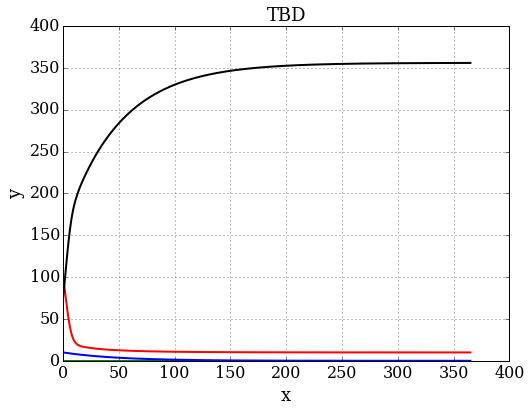

In [212]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('TBD', fontsize=18)
pyplot.plot(t,u[:,0], color= 'red', lw=2);
pyplot.plot(t,u[:,1], color='green', lw=2);
pyplot.plot(t,u[:,2], color='black', lw=2);
pyplot.plot(t,u[:,3], color='blue', lw=2);

In [218]:
from ipywidgets import StaticInteract, RangeWidget, RadioWidget

ImportError: cannot import name 'StaticInteract'

Project Structure

-Introduction of problem
-Latex equations and derivations
-Initial Code
-Same code with varied parameters
-Introduction of python widgets
-Install instructions
-Code implementation
-Final graph with fully functioning widgets!
-Stylesheet

